Generating train split:   0%|          | 0/4000 [00:00<?, ? examples/s]

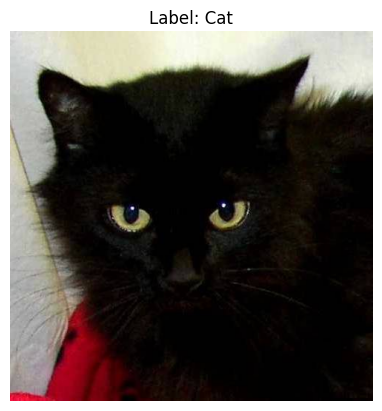

In [2]:
from datasets import load_dataset
from PIL import Image
import matplotlib.pyplot as plt

dataset = load_dataset("pantelism/cats-vs-dogs")

sample = dataset["train"][0]  

img = sample["image"]
label = sample["label"]

plt.imshow(img)
plt.title(f"Label: {'Dog' if label == 1 else 'Cat'}")
plt.axis("off")
plt.show()


In [4]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from captum.attr import IntegratedGradients
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model = models.resnet50(pretrained=True)
model.eval()  

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
dataset = load_dataset("pantelism/cats-vs-dogs")

sample = dataset["train"][0]
img = sample["image"]  # PIL image
label = "Dog" if sample["label"] == 1 else "Cat"

In [ ]:
input_img = transform(img).unsqueeze(0)  

In [ ]:
ig = IntegratedGradients(model)
pred = model(input_img).argmax(dim=1).item()

In [ ]:
attr, delta = ig.attribute(input_img, target=pred, return_convergence_delta=True)

/workspaces/eng-ai-agents/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/workspaces/eng-ai-agents/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


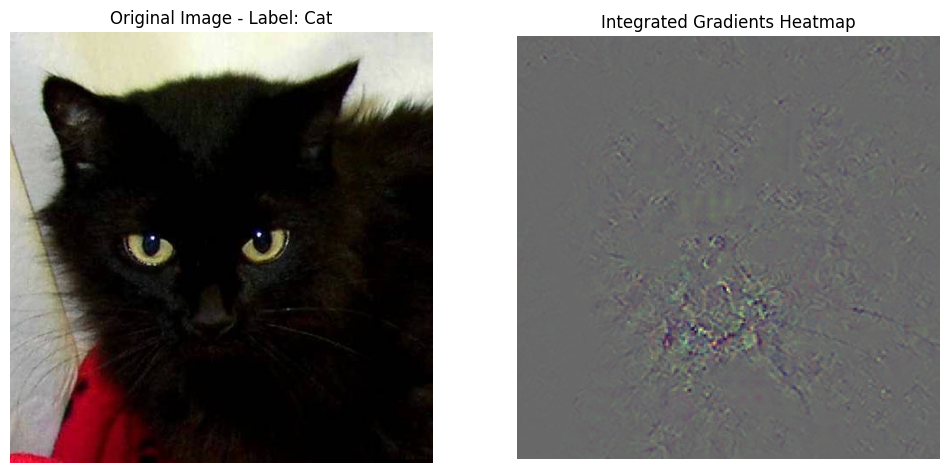

In [3]:
attr = attr.squeeze().detach().numpy().transpose(1, 2, 0)

def visualize_attribution(attr, original_img):
    attr = (attr - attr.min()) / (attr.max() - attr.min())
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(original_img)
    ax[0].set_title(f"Original Image - Label: {label}")
    ax[0].axis("off")

    ax[1].imshow(attr, cmap='inferno')
    ax[1].set_title("Integrated Gradients Heatmap")
    ax[1].axis("off")

    plt.show()

visualize_attribution(attr, img)
